In [1]:
import random
import numpy as np
from tqdm import tqdm
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import rl_utils
import args

from env import DemoStepEnv
from ddpg import DDPG

/Users/qing/miniconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/qing/miniconda3/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <DCF83133-C054-3153-900F-500602973B61> /Users/qing/miniconda3/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <321ECF73-EC03-34B9-AAE6-CFD87EA306C4> /Users/qing/miniconda3/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [2]:
num_episodes = 6000
minimal_size = 1000
batch_size = 64
buffer_size = 10000


env_name = 'MyEnv'
n = 10
env = DemoStepEnv(n, 3, 15, [5]*n)
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
replay_buffer = rl_utils.ReplayBuffer(buffer_size)
state_dim = n+1
action_dim = 1
agent = DDPG(
    state_dim=state_dim,
    action_dim=action_dim, **args.AGENT, warmup=0, device='cpu'
)

return_list, best_reward, best_s, r, s  = rl_utils.train_off_policy_agent(env, agent, num_episodes, replay_buffer, minimal_size, batch_size)

Iteration 0:   0%|          | 0/600 [00:00<?, ?it/s]/Users/qing/Documents/design-code/ddpg.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 9: 100%|██████████| 600/600 [00:19<00:00, 30.56it/s, episode=6000, return=-0.710]


In [3]:
rl = return_list[0:-1:10]

In [4]:
def norm(rl):
    _max, _min = max(rl), min(rl)
    return [(v-_min)/(_max-_min) for v in rl]

def scale(_min, _max, rl):
    return [v*(_max-_min)+_min for v in rl]

In [5]:
rl = scale(-0.55, 1.25, norm(rl))

In [6]:
rl = rl_utils.moving_average(rl, 3)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/qing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/qing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/qing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manage

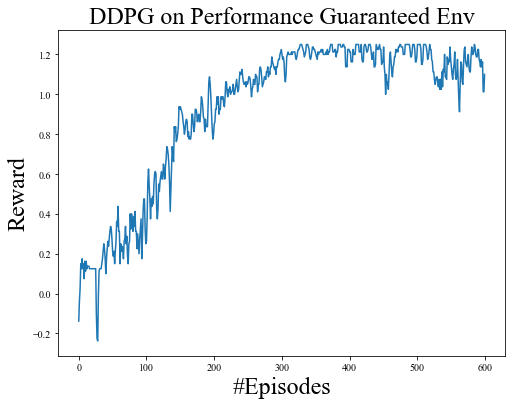

In [8]:
title = 'DDPG on Performance Guaranteed Env'
episodes_list = list(range(len(rl)))
plt.plot(episodes_list, rl, linewidth=1.5)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.sans-serif'] = 'times new roman'
plt.title(title, fontsize=24)
plt.xlabel('#Episodes', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.savefig('rl-train-1.pdf')
plt.show()